In [3]:
import numpy as np # linear algebra
import pandas as pd # df processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('heart_failure_clinical_records.csv')


df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [6]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [7]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Total number of Living case:- 203
Total number of Death case:- 96


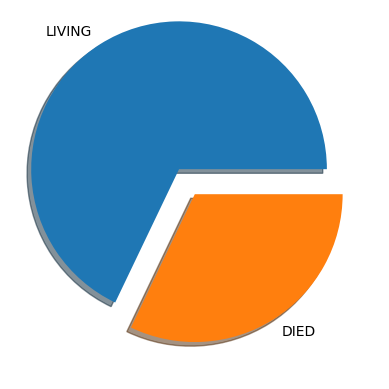

In [8]:
len_live = len(df['DEATH_EVENT'][df['DEATH_EVENT'] == 0])
len_death = len(df['DEATH_EVENT'][df['DEATH_EVENT'] == 1])

arr = np.array([len_live, len_death])
labels = ['LIVING','DIED']

print(f'Total number of Living case:- {len_live}')
print(f'Total number of Death case:- {len_death}')

plt.pie(arr, labels = labels, explode=[0.2,0.0], shadow = True)
plt.show()

<Axes: xlabel='age', ylabel='Density'>

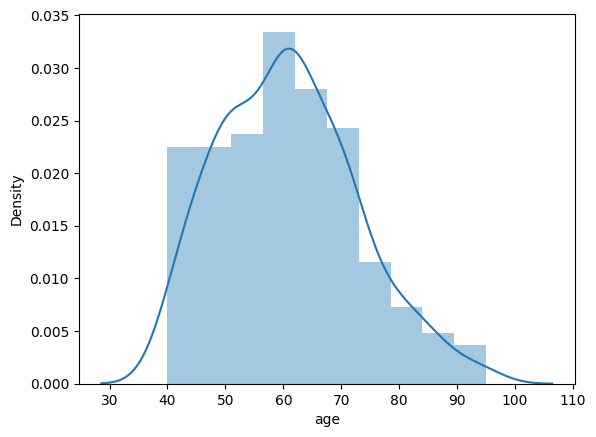

In [10]:
sns.distplot(df['age'])

Total number of Died:- 85
Total number of Not Died:- 167


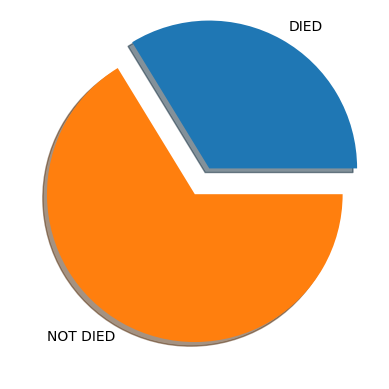

In [11]:
age_above_50_not_died = df['DEATH_EVENT'][df.age >=50][df.DEATH_EVENT == 0]
age_above_50_died = df['DEATH_EVENT'][df.age >= 50][df.DEATH_EVENT == 1]

len_died = len(age_above_50_died)
len_not_died = len(age_above_50_not_died)

arr1 = np.array([len_died, len_not_died])
labels =['DIED','NOT DIED']

print(f'Total number of Died:- {len_died}')
print(f'Total number of Not Died:- {len_not_died}')

plt.pie(arr1, labels=labels, explode = [0.2, 0.0], shadow= True)
plt.show()

Total number of Died with diabetes:- 40
Total number of Not died with diabetes: 118


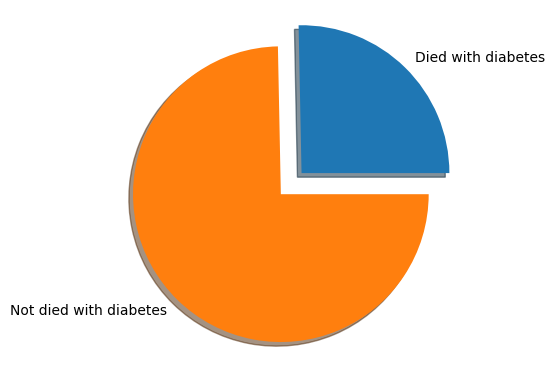

In [12]:
patient_nhave_diabetes_0 = df['DEATH_EVENT'][df.diabetes == 0][df.DEATH_EVENT ==0]
patient_have_diabetes_1 = df['DEATH_EVENT'][df.diabetes == 1][df.DEATH_EVENT == 1]

len_d_died = len(patient_have_diabetes_1)
len_d_alive = len(patient_nhave_diabetes_0)

arr2 = np.array([len_d_died, len_d_alive])
labels = ['Died with diabetes', 'Not died with diabetes']

print(f'Total number of Died with diabetes:- {len_d_died}')
print(f'Total number of Not died with diabetes: {len_d_alive}')

plt.pie(arr2, labels=labels, explode = [0.2,0.0], shadow = True)
plt.show()

<Axes: >

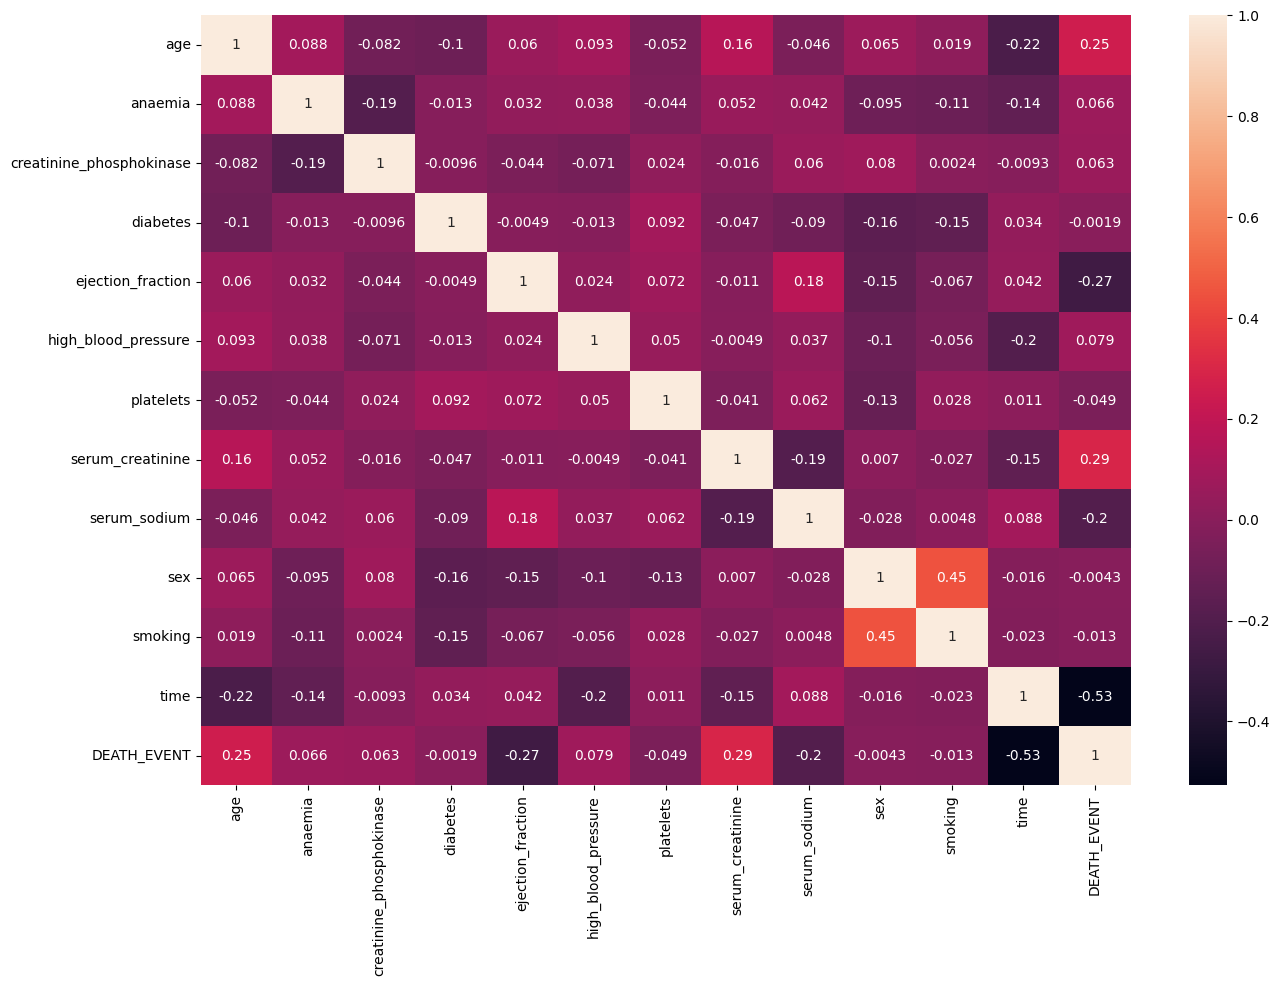

In [14]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, annot=True)

In [24]:
from sklearn.model_selection import train_test_split

X = df.drop('DEATH_EVENT', axis = 1)
y = df['DEATH_EVENT']

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 0)

print(f'Shape of the X_train {X_train.shape}')
print(f'Shape of the X_test {X_test.shape}')
print(f'Shape of the y_train {y_train.shape}')
print(f'Shape of the y_test {y_test.shape}')

Shape of the X_train (209, 12)
Shape of the X_test (90, 12)
Shape of the y_train (209,)
Shape of the y_test (90,)


In [17]:
def add_interactions(X):
    features = X.columns
    m = len(features)
    X_int = X.copy(deep = True)
    
    for i in range(m):
        feature_i_name = features[i]
        feature_i_data = X[feature_i_name]
        
        for j in range(i+1, m):
            feature_j_name = features[j]
            feature_j_data = X[feature_j_name]
            feature_i_j_name = feature_i_name + '_X_' + feature_j_name
            X_int[feature_i_j_name] = feature_i_data * feature_j_data
    return X_int

X_train_mod = add_interactions(X_train)
X_test_mod = add_interactions(X_test)

In [18]:
X_train_mod

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,...,serum_creatinine_X_serum_sodium,serum_creatinine_X_sex,serum_creatinine_X_smoking,serum_creatinine_X_time,serum_sodium_X_sex,serum_sodium_X_smoking,serum_sodium_X_time,sex_X_smoking,sex_X_time,smoking_X_time
281,70.0,0,582,0,40,0,51000.0,2.7,136,1,...,367.2,2.7,2.7,675.0,136,136,34000,1,250,250
44,60.0,1,588,1,60,0,194000.0,1.1,142,0,...,156.2,0.0,0.0,36.3,0,0,4686,0,0,0
241,65.0,0,582,1,30,0,249000.0,1.3,136,1,...,176.8,1.3,1.3,275.6,136,136,28832,1,212,212
189,40.0,0,244,0,45,1,275000.0,0.9,140,0,...,126.0,0.0,0.0,156.6,0,0,24360,0,0,0
152,50.0,0,115,0,45,1,184000.0,0.9,134,1,...,120.6,0.9,0.9,106.2,134,134,15812,1,118,118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,55.0,0,572,1,35,0,231000.0,0.8,143,0,...,114.4,0.0,0.0,172.0,0,0,30745,0,0,0
192,50.0,1,121,1,40,0,260000.0,0.7,130,1,...,91.0,0.7,0.0,122.5,130,0,22750,0,175,0
117,85.0,1,102,0,60,0,507000.0,3.2,138,0,...,441.6,0.0,0.0,300.8,0,0,12972,0,0,0
47,60.0,0,582,1,38,1,451000.0,0.6,138,1,...,82.8,0.6,0.6,24.0,138,138,5520,1,40,40


In [19]:
X_test_mod

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,...,serum_creatinine_X_serum_sodium,serum_creatinine_X_sex,serum_creatinine_X_smoking,serum_creatinine_X_time,serum_sodium_X_sex,serum_sodium_X_smoking,serum_sodium_X_time,sex_X_smoking,sex_X_time,smoking_X_time
206,40.000,1,101,0,40,0,226000.0,0.8,141,0,...,112.8,0.0,0.0,149.6,0,0,26367,0,0,0
188,60.667,1,151,1,40,1,201000.0,1.0,136,0,...,136.0,0.0,0.0,172.0,0,0,23392,0,0,0
12,45.000,1,981,0,30,0,136000.0,1.1,137,1,...,150.7,1.1,0.0,12.1,137,0,1507,0,11,0
219,55.000,0,582,1,35,1,371000.0,0.7,140,0,...,98.0,0.0,0.0,137.9,0,0,27580,0,0,0
237,70.000,0,232,0,30,0,173000.0,1.2,132,1,...,158.4,1.2,0.0,252.0,132,0,27720,0,210,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,70.000,0,92,0,60,1,317000.0,0.8,140,0,...,112.0,0.0,0.8,59.2,0,140,10360,0,0,74
210,70.000,0,212,1,17,1,389000.0,1.0,136,1,...,136.0,1.0,1.0,188.0,136,136,25568,1,188,188
223,47.000,0,582,0,25,0,130000.0,0.8,134,1,...,107.2,0.8,0.0,160.8,134,0,26934,0,201,0
253,70.000,0,88,1,35,1,236000.0,1.2,132,0,...,158.4,0.0,0.0,258.0,0,0,28380,0,0,0


In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

def evaluating_model(y_test, y_pred):
    '''
    Function for evaliating our models
    '''
    print(f'Accuracy Score:- {accuracy_score(y_test, y_pred)}')
    print(f'Precision Score:- {precision_score(y_test,y_pred)}')
    print(f'Recall Score:- {recall_score(y_test,y_pred)}')
    print(f'Confusion Matrix:- \n{confusion_matrix(y_test, y_pred)}')

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr_model_pip = make_pipeline(StandardScaler(), LogisticRegression())
lr_model_pip.fit(X_train, y_train)

y_pred1 = lr_model_pip.predict(X_test)
evaluating_model(y_test, y_pred1)

Accuracy Score:- 0.8111111111111111
Precision Score:- 0.7894736842105263
Recall Score:- 0.5357142857142857
Confusion Matrix:- 
[[58  4]
 [13 15]]


In [28]:
from xgboost import XGBClassifier

xgb1 = XGBClassifier(colsample_bytree = 1.0, 
                    learning_rate = 0.1,
                    max_depth = 4,
                    n_estimators = 4,
                    subsample = 1.0)

eval_set = [(X_test, y_test)]
xgb1.fit(X_train, y_train, early_stopping_rounds = 10, eval_metric = 'logloss', eval_set = eval_set, verbose = True)

[0]	validation_0-logloss:0.57444
[1]	validation_0-logloss:0.53675
[2]	validation_0-logloss:0.50777
[3]	validation_0-logloss:0.48659


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=4, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [29]:
pred = xgb1.predict(X_test)
evaluating_model(y_test, pred)

Accuracy Score:- 0.8
Precision Score:- 0.9166666666666666
Recall Score:- 0.39285714285714285
Confusion Matrix:- 
[[61  1]
 [17 11]]


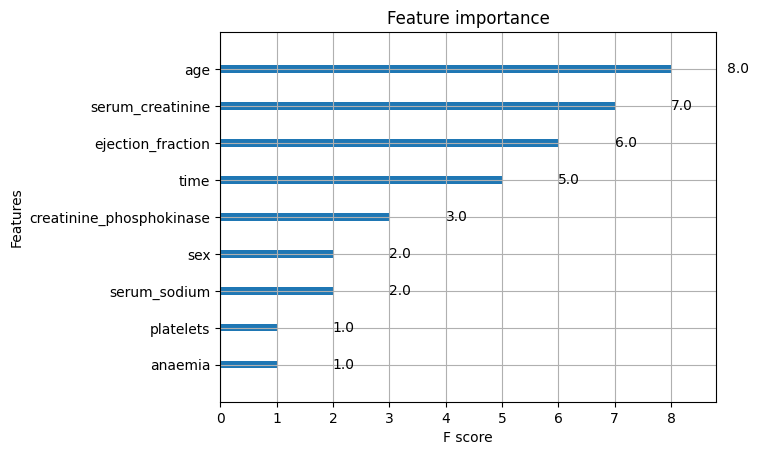

In [31]:
from xgboost import plot_importance
plot_importance(xgb1)
plt.show()

In [32]:
import joblib
joblib.dump(xgb1, 'model.pkl')
model = joblib.load('model.pkl')
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [42]:
import joblib
joblib.dump(xgb1, 'model.pkl')
model = joblib.load('model.pkl')
df_predictt = pd.DataFrame([[75, 0, 582, 0, 20, 1, 265000, 1.9, 130, 1, 0, 4]])

df_predictt.columns = ["age", "anaemia", "creatinine_phosphokinase", "diabetes", "ejection_fraction", "high_blood_pressure", "platelets", "serum_creatinine", "serum_sodium", "sex", "smoking", "time"]

df_predictt.columns
# model.predict(df_predict)

ValueError: Length mismatch: Expected axis has 1 elements, new values have 12 elements